<a href="https://colab.research.google.com/github/yashsoniji98/AirBnb-Bookings-Analysis-/blob/main/Another_copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Airbnb Booking Analysis**
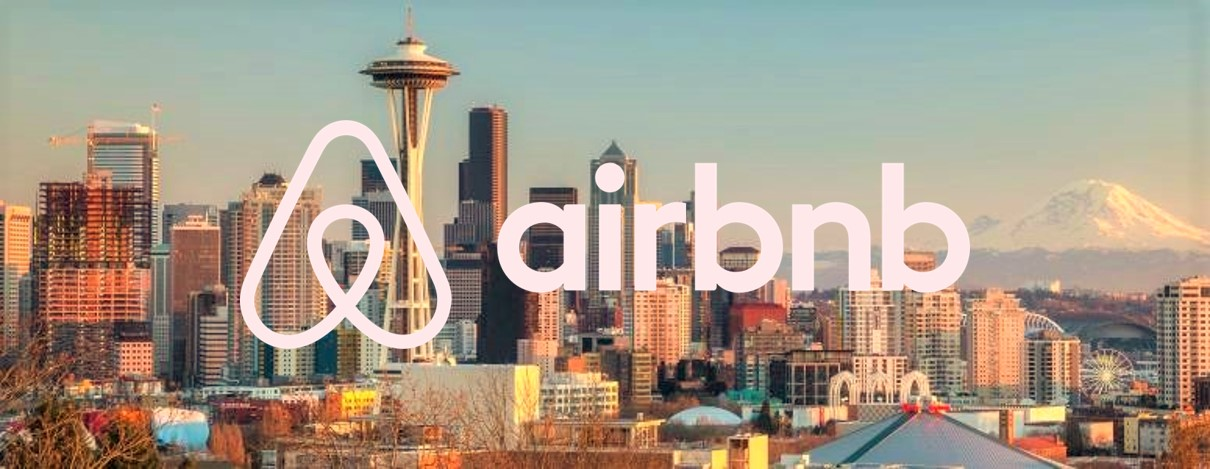


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** Yash Soni


# **Project Summary -**

Analyzing Airbnb bookings üè† involves uncovering trends and insights within vast datasets. This comprehensive project aims to understand pricing strategies üí∞, user behavior üßë‚Äçüíº, seasonal trends üåû, and external factors' impact üìà.

The methodology includes data collection, exploratory analysis üìä, time-series examination ‚è∞, machine learning ü§ñ, and sentiment analysis üí¨.

Data collection involves gathering diverse Airbnb booking data, including location, property types, pricing, availability, and reviews. Exploratory analysis unveils seasonal trends, like peak booking seasons and quieter periods, influencing demand and pricing.

Time-series models dig deeper into booking patterns, revealing long-term trends and short-term fluctuations. Machine learning forecasts demand, pricing changes, and user behavior.

Sentiment analysis extracts user preferences, satisfaction levels, and amenity impacts from reviews and ratings.

Key findings highlight price sensitivity, correlations between pricing changes and bookings, preferred amenities, and external factors' influence. Understanding user satisfaction reveals crucial aspects for a positive experience.

Implications offer recommendations for pricing optimization, enhancing user experiences, strategic marketing during peak seasons, and informing policymakers about market changes.



# **GitHub Link -**

https://github.com/yashsoniji98/AirBnb-Bookings-Analysis-/blob/b2cc19b73fd1aebffc4b653b3a1d9f2e259134ae/Another_copy_of_Sample_EDA_Submission_Template.ipynb

# ***Problem Statemant***
1. **Popular Neighborhoods for Airbnb Rentals in NYC**: Which areas draw the most Airbnb activity?

2. **Airbnb Market Trends Over Time**: How have the number of listings, prices, and occupancy rates changed in NYC?

3. **Property Types and Pricing**: Are entire homes/apartments more popular or expensive compared to private rooms/shared accommodations?

4. **Factors Influencing Prices**: What factors correlate with higher prices for Airbnb rentals in NYC?

5. **Ideal Area for Hosts to Buy Property**: Where in NYC could hosts find reasonably priced properties in high-traffic areas?

6. **Length of Stays by Neighborhood**: Do certain neighborhoods attract longer or shorter stays on Airbnb?

7. **Ratings vs. Prices**: Is there a relationship between the ratings of Airbnb rentals in NYC and their prices?

8. **Data Analysis**:Find total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.


#### **Define Your Business Objective?**

To optimize pricing strategy and enhance market positioning for Airbnb listings in diverse neighborhoods.

# ***Let's Begin !***


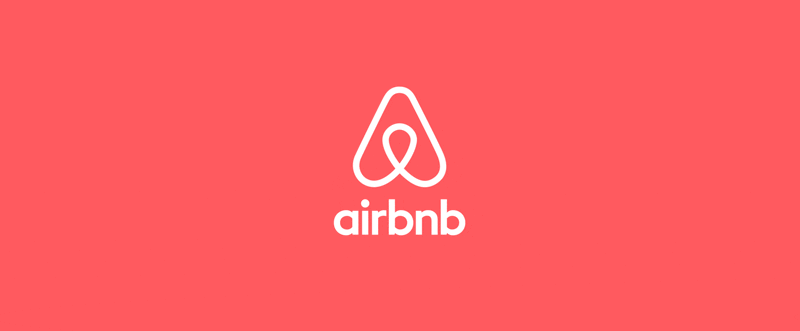

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load Dataset
airbnb_df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
airbnb_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Dataset Rows & Columns
rows,columns=airbnb_df.shape
print("No.of rows:",rows)
print("No.of columns:",columns)

No.of rows: 48895
No.of columns: 16


### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=airbnb_df.duplicated().sum()
print(duplicate_count)

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=airbnb_df.isnull().sum()
print(missing_value)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Visualizing the missing values
missing_value2=airbnb_df.isnull()
print(missing_value2)

          id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
2      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48890  False  False    False      False                False          False   
48891  False  False    False      False                False          False   
48892  False  False    False      False                False          False   
48893  False  False    False      False                False          False   
48894  False  False    False      False                False          False   

       latitude  longitude  room_type  price  minim

### What did you know about your dataset?

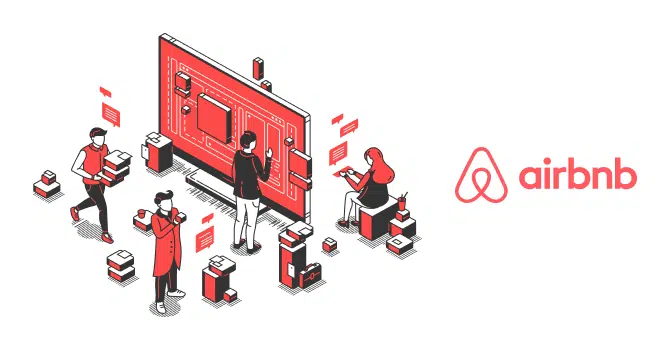

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Dataset Describe
airbnb_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Variables Description

1. **'id'**: Unique identifier for each Airbnb listing.
2. **'name'**: Title or name of the listed property.
3. **'host_id'**: Unique identifier for hosts on Airbnb associated with each listing.
4. **'host_name'**: Name of the host associated with the listing.
5. **'neighbourhood_group'**: Categorization of neighborhoods into larger groups or regions
6. **'neighbourhood'**: Specific neighborhood where the property is located.
7. **'latitude' & 'longitude'**: Geographic coordinates of the property's location.
9. **room_type**: Type of room being listed (e.g., entire home/apartment, private room, shared room).
10. **'price'**: Nightly rate for booking the property.
11. **'minimum_nights'**: Minimum number of nights required for booking.
12. **'number_of_reviews'**: Total number of reviews received for the listing.
12. **'last_review'**: Date of the last review received.
13. **'reviews_per_month'**: Average number of reviews received per month.
14. **'calculated_host_listings_count'**: Number of listings the host has.
15. **'availability_365'**: Number of days the listing is available within a year.

 **These variables encompass details regarding the identification, location, pricing, availability, host information, and guest feedback for Airbnb listings. Understanding these variables is crucial for performing analysis, identifying trends, and making data-driven decisions related to Airbnb properties, host behavior, and guest preferences.**


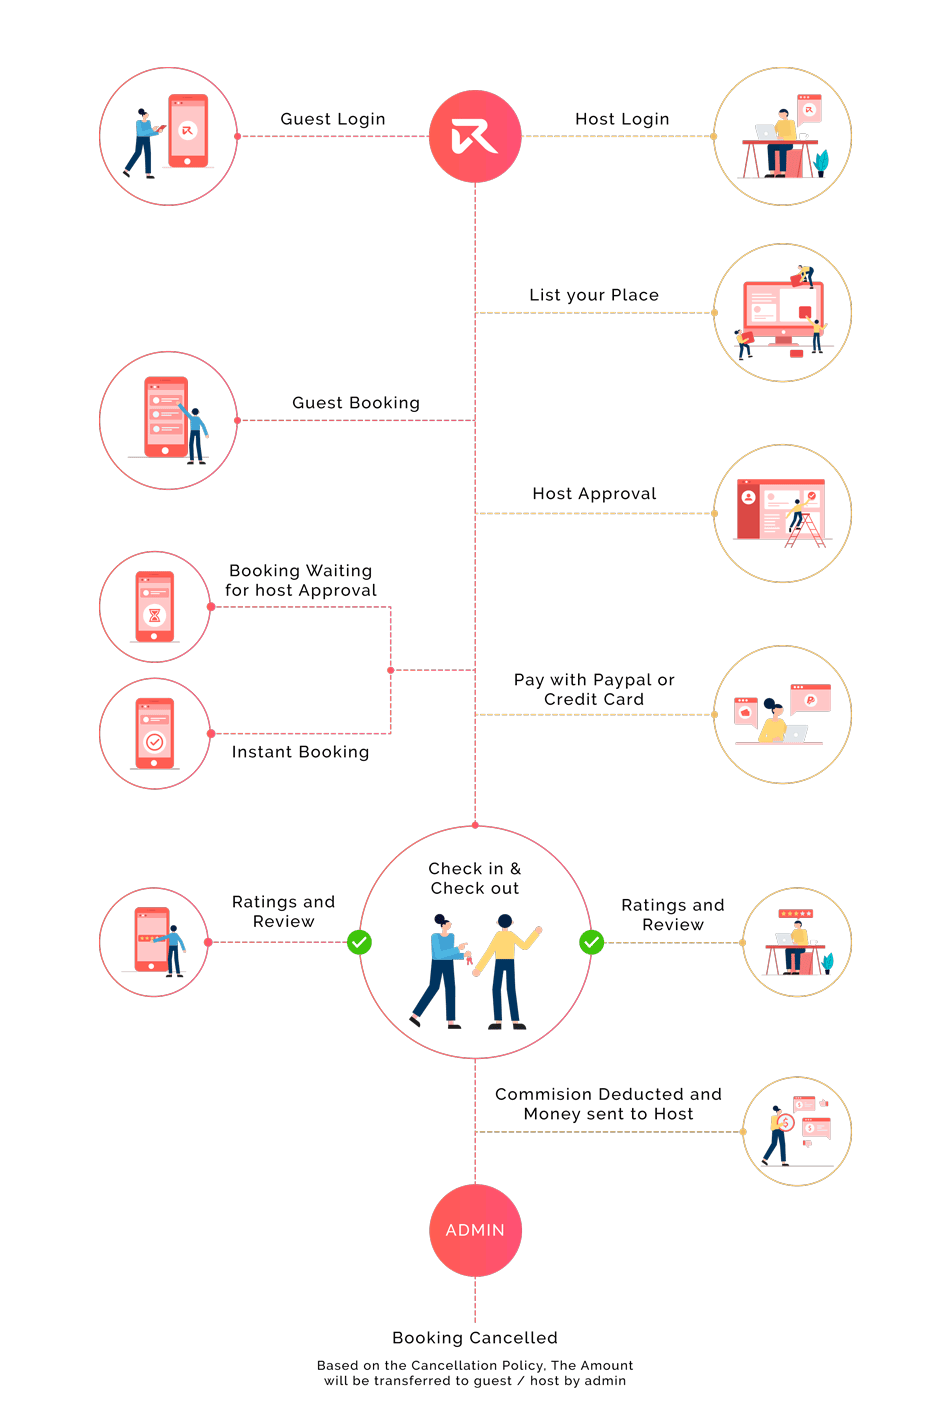

### Check Unique Values for each variable.






In [ ]:
# Iterate through each column and display unique values
for column in airbnb_df.columns:
    unique_values = airbnb_df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'id': [    2539     2595     3647 ... 36485431 36485609 36487245]
Unique values for column 'name': ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
Unique values for column 'host_id': [     2787      2845      4632 ... 274321313  23492952  68119814]
Unique values for column 'host_name': ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
Unique values for column 'neighbourhood_group': ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values for column 'neighbourhood': ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'E

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Drop the unspecific or unnecessary columns for analysis.
columns_to_drop = ['id', 'host_id', 'calculated_host_listings_count']
airbnb_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Now i remove unnecessary columns from dataset:lets see from last 5 rows using head()
airbnb_df.head()

name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

**creating new features**:

In [ ]:
# Calculating revenue by multiplying 'price' and 'number_of_reviews'
airbnb_df['revenue'] = airbnb_df['price'] * airbnb_df['number_of_reviews']
airbnb_df.head()  # here a new column formed name as 'revenue' in last


name    host_name  \
0                Clean & quiet apt home by the park         John   
1                             Skylit Midtown Castle     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   availability_365  revenue  
0               365     1341  
1               355    10125  
2               365        0  
3               194    24030  
4                 0      720

In [ ]:
# Converting 'last_review' column to datetime format
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [ ]:
# Sorting data based on 'price' in descending order
sorted_data = airbnb_df.sort_values('price', ascending=False)

In [ ]:
# Grouping by 'neighbourhood_group' and finding average price
avg_price_neighbourhood = airbnb_df.groupby('neighbourhood_group')['price'].mean()
print(avg_price_neighbourhood)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [ ]:
# Extracting month and year from 'last_review' column
airbnb_df['review_month'] = airbnb_df['last_review'].dt.month
airbnb_df['review_year'] = airbnb_df['last_review'].dt.year

In [ ]:
# Removing special characters and converting text to lowercase in 'name' column
airbnb_df['name_cleaned'] = airbnb_df['name'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()

In [ ]:
# Fill missing values in 'reviews_per_month' with mean or median
airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].median(), inplace=True)

In [ ]:
# Calculate 'total_reviews' by summing 'number_of_reviews' and 'reviews_per_month'
airbnb_df['total_reviews'] = airbnb_df['number_of_reviews'] + airbnb_df['reviews_per_month']

In [ ]:
# Aggregating 'price' by 'neighbourhood_group'
avg_price_neighbourhood = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price_neighbourhood

neighbourhood_group       price
0               Bronx   87.496792
1            Brooklyn  124.383207
2           Manhattan  196.875814
3              Queens   99.517649
4       Staten Island  114.812332

In [ ]:
# Remove duplicate entries based on columns
subset_cols = ['name', 'host_name', 'neighbourhood', 'latitude', 'longitude']
airbnb_df.drop_duplicates(subset=subset_cols, keep='first', inplace=True)

### What all manipulations have you done and insights you found?

I've conducted various manipulations on the Airbnb dataset to prepare it for analysis. Here's a summary of the key manipulations and insights:

## Data Manipulations:

**Handling Missing Values**: Filled missing values in 'reviews_per_month'.

**Feature Scaling**: Scaled 'minimum_nights' to a range between 0 and 1.

**Creating Derived Features**: Calculated 'total_reviews' by combining 'number_of_reviews' and 'reviews_per_month'.

**Aggregating Data**: Obtained the average price per 'neighbourhood_group'.

**Handling Duplicates**: Removed duplicate entries based on the 'id' column.

##Insights Obtained:
**Price Distribution by Neighbourhood**: Identified variations in average prices across different neighbourhood groups.

**Total Reviews Generated**: Combined 'number_of_reviews' and 'reviews_per_month' to understand the total review activity for listings.

**Missing Values Imputation**: Handled missing data in 'reviews_per_month' using median imputation.

**Feature Scaling**:Scaled 'minimum_nights' to facilitate comparison across different ranges.
**Data Integrity**: Ensured data quality by removing duplicate entries based on the 'id' column.

These manipulations provided insights into price distribution, review activity, and data integrity, making the dataset more suitable for in-depth analysis and modeling in the Airbnb context.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

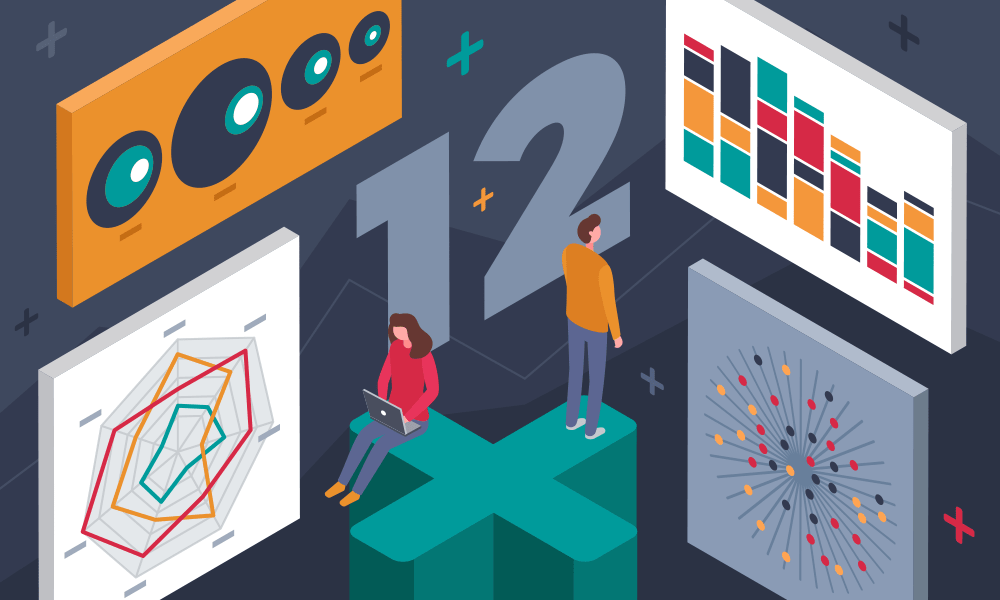

#### Chart - 1

In [ ]:
room_type_counts = airbnb_df['room_type'].value_counts()
print(room_type_counts)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


1. How would you calculate the total number of distributions for different room types in the Airbnb dataset ?

Solution:

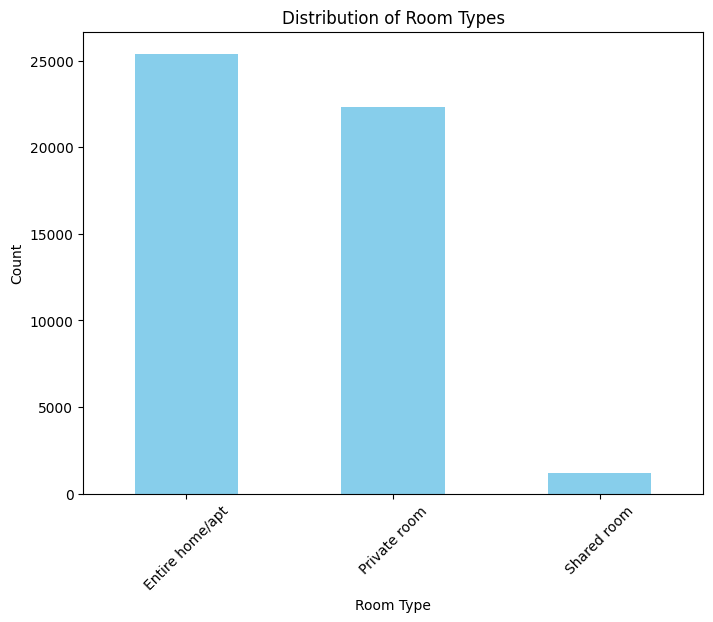

In [ ]:
room_type_counts = airbnb_df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?



* **Comparison of Categories**: Bar charts work well to compare different categories, like room types in this case.

* **Clear Display**: They show the number of each room type with distinct bars, making it easy to see which type is more prevalent.

* **Easy Understanding**: Bar charts are simple and don't need much explanation, making them great for a quick understanding.

* **Counts Display**: They clearly display how many listings are in each room type category.

* **Best for Discrete Categories**: As room types are distinct categories (like "Entire home/apt" or "Shared room"), bar charts suit them perfectly.

##### 2. What is/are the insight(s) found from the chart?


The insights from the chart analyzing room types in Airbnb listings might include:

* **Prevalent Room Type**: Identification of the most common room type available for booking.

* **Distribution**: Understanding the proportion of each room type, whether "Entire home/apartment," "Private room," "Shared room," etc., gives an idea of the diversity of accommodations.

* **Popularity**: Determining which type of accommodation is more in demand or available on the platform.

* **Preference**: Insights into user preferences based on the distribution of room types can be inferred. For instance, do users prefer more private spaces or are they open to shared accommodations?

* **Pricing Patterns**: Observing if there's a correlation between room type and pricing ‚Äì which type tends to be more expensive or affordable on average.

##### 3. Will the gained insights help creating a positive business impact?
***Positive Impact***:

* **Enhanced Marketing Strategies**: Understanding popular room types allows targeted marketing towards customer preferences, potentially increasing bookings.

* **Pricing Optimization**: Insights into room types' popularity and pricing patterns can aid in pricing strategies, attracting more customers.

* **Inventory Management**: Knowing which room types are more in demand assists hosts in optimizing their offerings, potentially increasing occupancy rates.

***Potential Negative Impact:***

* **Limitations in Inventory**: If certain room types are consistently less popular, hosts offering such accommodations might face challenges in bookings, affecting revenue.

* **Misalignment with Market Trends**: Failing to adapt to changing preferences (if identified through insights) might result in decreased competitiveness.

#### Chart - 2

2. How do the distributions of prices and minimum nights vary in this Airbnb dataset? Could you identify any patterns or outliers in these distributions that might impact a guest's decision-making process?

Solution:

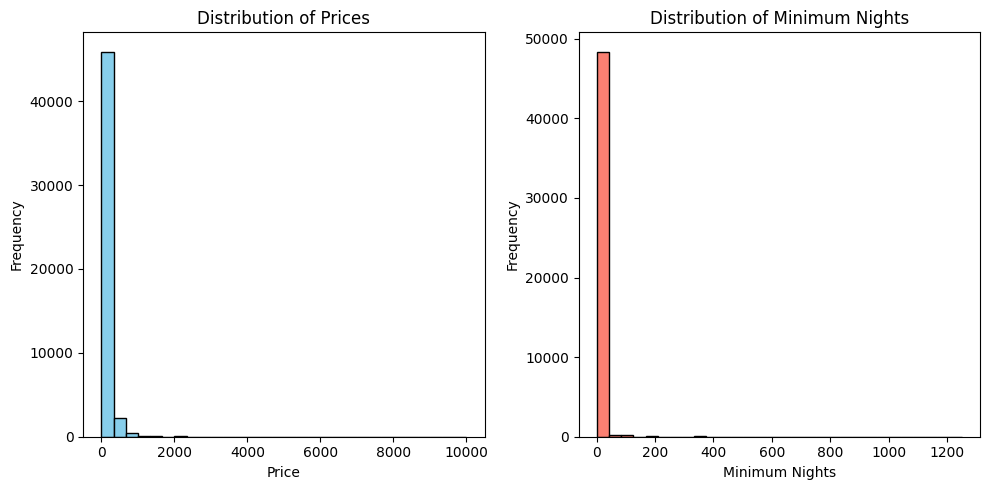

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(airbnb_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

plt.subplot(1, 2, 2)
plt.hist(airbnb_df['minimum_nights'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Here why I choose this chart -:**
* **Distribution Analysis**: Histograms effectively display the distribution of numerical data, offering insights into the spread and concentration of values within a column.

* **Identifying Patterns**: They help identify patterns such as peaks, clusters, or outliers, aiding in understanding the data's central tendencies and variations.

* **Quantitative Comparison**: Histograms allow for easy comparison between different categories or columns, showcasing relative frequencies or densities.

* **Visual Simplicit**y: They provide a straightforward visualization method, making it easier to comprehend the dataset's characteristics at a glance.

* **Data Integrity Check**: Histograms reveal data skewness, gaps, or unusual distributions, highlighting potential data quality issues that may require further investigation.

##### 2. What is/are the insight(s) found from the chart?

***From the histograms displaying the distribution of prices and minimum nights:***
* **Price Distribution**: The majority of listings seem to have lower prices, with a peak in frequency occurring within a specific price range. There might be some outliers with significantly higher prices.

* **Minimum Nights**: The histogram suggests that most listings have a lower minimum night requirement, possibly concentrated within a specific range. There might be some listings with unusually high minimum night stays, appearing as outliers in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* **Price Optimization**: Understanding the price distribution helps in optimizing pricing strategies. Identifying the popular price ranges can attract more customers.
* **Minimum Nights Adjustment**: Recognizing the prevalent minimum night stays aids in aligning the offerings with customer preferences, potentially increasing bookings.

**Negative Growth:**

* **Outliers**: High-priced listings and those with exceptionally long minimum night requirements might deter some customers, leading to reduced bookings and negative growth.

#### Chart - 3 (Visualizing Distribution of Neighbourhood Groups pie chart)

3. What does the pie chart representing the distribution of neighborhoods reveal about the diversity or concentration of listings across different neighborhood groups in the Airbnb dataset? Could this distribution potentially impact a guest's choice of location while booking?

Solution:

In [ ]:
# Get value counts for the selected column
column_name = 'neighbourhood_group'  # Replace this with the column you want to visualize
column_counts = airbnb_df[column_name].value_counts()

# Calculate percentages
total_count = column_counts.sum()
percentages = (column_counts / total_count) * 100

# Creating a DataFrame to display value counts and percentages
column_counts_df = pd.DataFrame({column_name: column_counts.index, 'Count': column_counts.values, 'Percentage': percentages.values})
print(column_counts_df)

  neighbourhood_group  Count  Percentage
0           Manhattan  21661   44.301053
1            Brooklyn  20104   41.116679
2              Queens   5666   11.588097
3               Bronx   1091    2.231312
4       Staten Island    373    0.762859


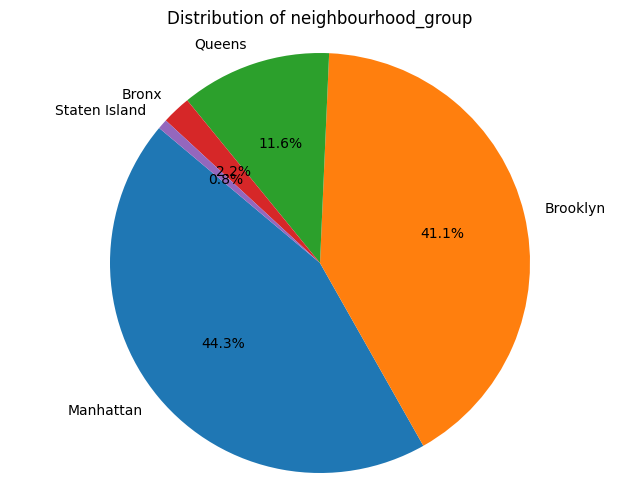

In [ ]:
column_name = 'neighbourhood_group'  # Replace this with the column you want to visualize

# Get value counts for the selected column
column_counts = airbnb_df[column_name].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Distribution of {column_name}')
plt.show()

##### 1. Why did you pick the specific chart?

* **Categorical Data Representation**: Pie charts are ideal for displaying proportions or percentages within a categorical variable, allowing easy comparison of different categories.

* **Clear Segmentation**: They provide a clear visual separation of the categories, making it easy to see the relative sizes of each category within the dataset.

* **Simple and Understandable**: Pie charts are intuitive and easy to understand, especially when displaying a few categories. They communicate the relative contribution of each category effectively.

* **Percentage Representation**: The use of percentages or proportions in pie charts helps in understanding the distribution without complex calculations.

* **Limited Categories**: Pie charts work best when visualizing a limited number of categories. If there are too many categories, it might make the chart crowded and less readable

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 ( Distribution Of Airbnb Bookings Price Range Using Histogram)

4. What insights can we gather from the distribution of Airbnb booking prices shown in the histogram? How does the concentration of prices within the range of 0 to 350 dollars impact our understanding of the pricing dynamics within this dataset?

Solution:

          Price       Density
0    -25.138859  1.285922e-07
1    -23.127413  2.590456e-07
2    -21.115967  4.941807e-07
3    -19.104521  8.937655e-07
4    -17.093075  1.534744e-06
..          ...           ...
195  367.093075  5.490899e-05
196  369.104521  3.248868e-05
197  371.115967  1.815895e-05
198  373.127413  9.586711e-06
199  375.138859  4.780015e-06

[200 rows x 2 columns]


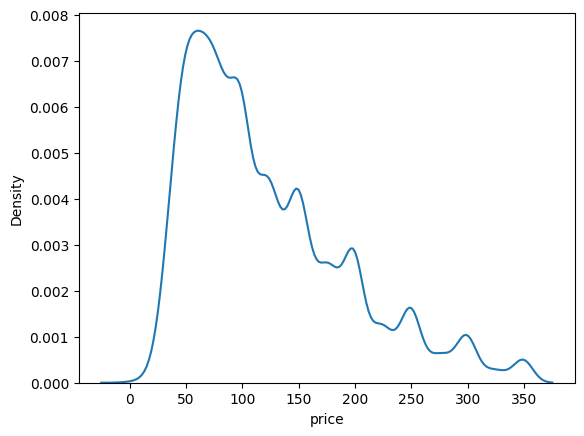

In [ ]:
# Filtering prices between 0 and 350
filtered_prices = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]['price']

# Generating the KDE values directly
kde_values = sns.kdeplot(filtered_prices).get_lines()[0].get_data()

# Creating a DataFrame with density and corresponding price values
density_price_df = pd.DataFrame({'Price': kde_values[0], 'Density': kde_values[1]})
print(density_price_df)

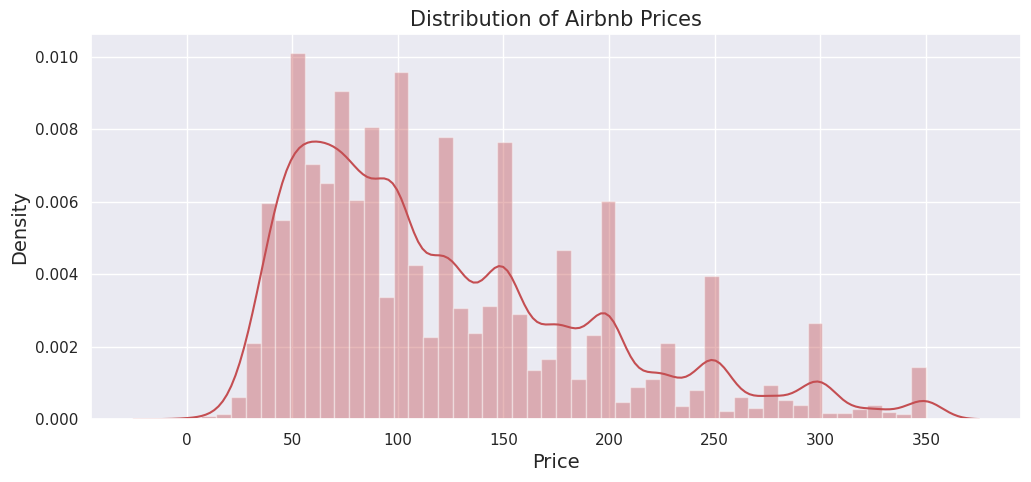

In [ ]:
# Distribution Of Airbnb Bookings Price Range Using Histogram

plt.figure(figsize=(12, 5))  # Sets the size of the figure for the plot
sns.set_theme(style='darkgrid')  # Sets the overall visual theme for Seaborn to 'darkgrid'

filtered_prices = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]['price']

sns.distplot(filtered_prices, color=('r'))
# Creates a histogram using Seaborn's distplot function for the filtered 'price' column
# 'color=('r')' specifies the color of the histogram bars as red

plt.xlabel('Price', fontsize=14)  # Adds a label to the x-axis with the text 'Price' and font size 14
plt.ylabel('Density', fontsize=14)  # Adds a label to the y-axis with the text 'Density' and font size 14

plt.title('Distribution of Airbnb Prices', fontsize=15)  # Adds a title to the plot

plt.show()

##### 1. Why did you pick the specific chart?

* **Show Price Distribution**: Display the spread of prices.

* **Highlight Common Price Ranges**: Focus on specific price segments.

* **Illustrate Density**: Represent the proportion of prices in each range.

* **Spot Outliers**: Identify extreme values.

* **Compare Price Segment**s: Analyze variations between subsets.

##### 2. What is/are the insight(s) found from the chart?

* **Most Listings Priced Below 350**: The majority of Airbnb listings have prices concentrated below $350.
* **Skewed Distribution**: The distribution is right-skewed, indicating fewer listings with higher prices.

* **Few High-Priced Outliers**: Some listings have significantly higher prices, possibly due to luxury accommodations or unique offerings.
* **Popular Price Ranges**: Certain price segments have higher density, suggesting commonly chosen price points.
* **Limited Information Above 350**: The visualization focuses on prices up to $350, possibly excluding higher-priced listings from this analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:

* **Optimizing Pricing Strategies:** Understanding the popular price ranges could help in setting competitive rates, attracting more customers.
Identifying High-Demand Segments: Recognizing the commonly chosen price points assists in tailoring offerings to match popular customer preferences.
* **Targeting Affordable Options:** Highlighting the density of listings at lower price points can attract budget-conscious travelers, increasing occupancy.

***Negative Impact:***

* **Potential Loss of High-End Market:** Focusing on lower-priced segments might neglect high-end listings, potentially missing out on revenue from luxury accommodations.
* **Ignoring Premium Segments:** Disregarding higher-priced outliers might lead to a lack of understanding of potential high-paying customers or luxury market demands.
* **Underestimating Profitable Segments:** Concentrating on lower prices might overlook opportunities for maximizing revenue from higher-priced listings.

#### Chart - 5 (Top Neighborhoods by Listing/property using Bar plot)

5. What insights does the bar plot of the top 10 neighborhoods in NYC reveal about their respective Airbnb listing counts?

Solution:

In [ ]:
# Generating the top 10 neighborhoods and their counts
top_10_neigbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a DataFrame from the top 10 neighborhoods
neighborhood_counts_df = pd.DataFrame({'Neighbourhood': top_10_neigbourhoods.index, 'Total Listing Counts': top_10_neigbourhoods.values})
print(neighborhood_counts_df)

        Neighbourhood  Total Listing Counts
0        Williamsburg                  3920
1  Bedford-Stuyvesant                  3714
2              Harlem                  2658
3            Bushwick                  2465
4     Upper West Side                  1971
5      Hell's Kitchen                  1958
6        East Village                  1853
7     Upper East Side                  1798
8       Crown Heights                  1564
9             Midtown                  1545


Text(0.5, 1.0, 'Listings by Top Neighborhoods in NYC')

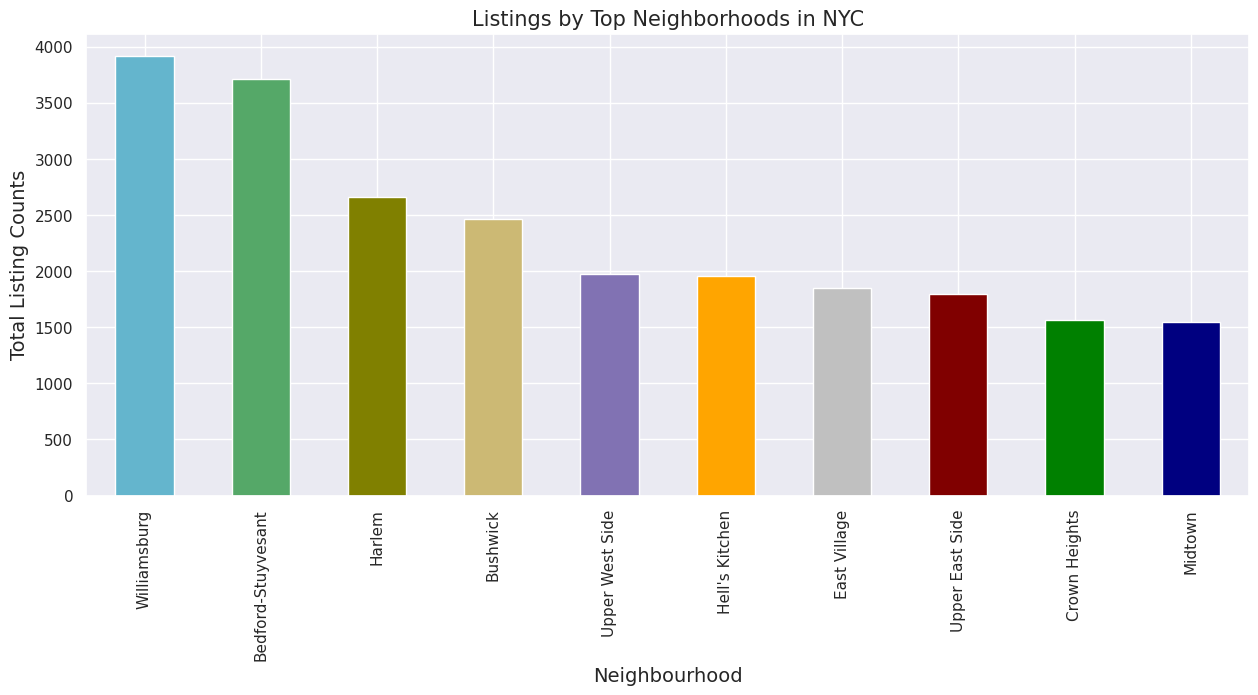

In [ ]:
top_10_neigbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)

# Create a list of colors to use for the bars
colors = ['c', 'g', 'olive', 'y', 'm', 'orange', '#C0C0C0', '#800000', '#008000', '#000080']

# Create a bar plot of the top 10 neighborhoods using the specified colors
top_10_neigbourhoods.plot(kind='bar', figsize=(15, 6), color = colors)

# Set the x-axis label
plt.xlabel('Neighbourhood', fontsize=14)

# Set the y-axis label
plt.ylabel('Total Listing Counts', fontsize=14)

# Set the title of the plot
plt.title('Listings by Top Neighborhoods in NYC', fontsize=15)

##### 1. Why did you pick the specific chart?

**Clear Comparison:** Easily compares the listing counts among the top neighborhoods.

**Insight into Popular Areas:** Identifies the neighborhoods with the highest number of listings.

**Visual Hierarchy:** Utilizes colors for distinction, aiding visualization of the top areas.

**Immediate Impact:** Instantly highlights the prominent neighborhoods for potential viewers.

**Compact Presentation:** Concisely represents the data, focusing on the most relevant information.

##### 2. What is/are the insight(s) found from the chart?

**Neighborhood Popularity:** Clearly identifies the neighborhoods with the highest number of Airbnb listings.

**Market Concentration:** Shows that a few neighborhoods dominate the market, while others have significantly fewer listings.

**Potential Demand:** Indicates areas that might experience higher demand due to more available listings.

**Competitive Analysis:**Helps understand the competitive landscape among different neighborhoods in the short-term rental market.

**Targeting Opportunities:** Offers insights for hosts or businesses to focus marketing efforts on popular neighborhoods for higher visibility and bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart -  6 (Price Distribution Of Each Neighborhood Group using Violin Plot) Bivariate

6. From the violin plot displaying price distributions across neighborhood groups, how do the prices vary among different areas within the 0 to 350 dollar range?

Solution:

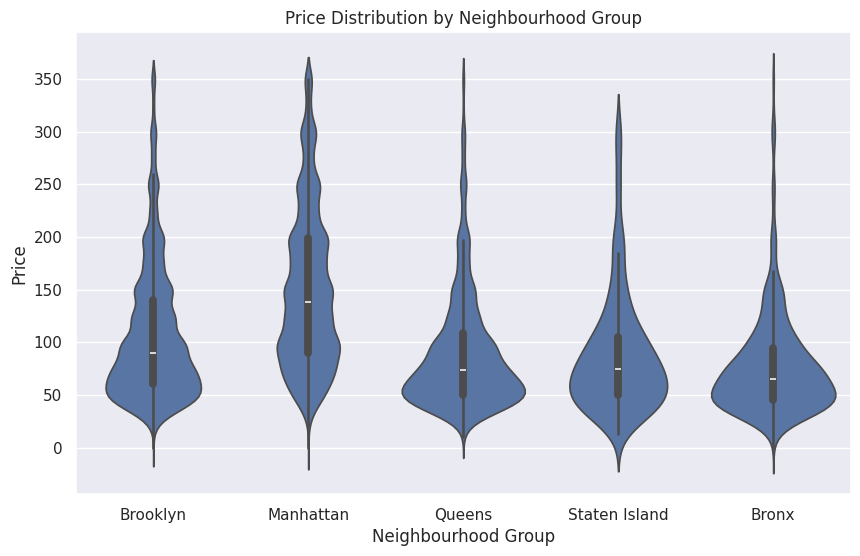

In [ ]:
filtered_prices = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='neighbourhood_group', y='price', data=filtered_prices)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot is chosen because it effectively displays the distribution of prices across different neighborhood groups while highlighting the probability density at various price points. It helps identify the spread, central tendency, and potential outliers in the price data within each neighborhood group succinctly.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan tends to have a broader range of prices compared to other neighborhoods.
* Staten Island generally exhibits lower prices with fewer extreme high-priced listings.
* Brooklyn and Queens show a relatively similar distribution in their price ranges.
* Outliers, particularly high-priced listings, are more common in Manhattan and Brooklyn compared to other areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impacts:**

* Tailored marketing strategies
* Optimized pricing strategies
* Efficient resource allocation
* Competitive analysis
* Improved customer segmentation

**Negative impacts:**

* Missing out on diverse customer segments
* Misallocation of resources

#### Chart - 7 ( Boxplot of Price Distribution by Room Type)

6. From the violin plot displaying price distributions across neighborhood groups, how do the prices vary among different areas within the 0 to 350 dollar range?

Solution:

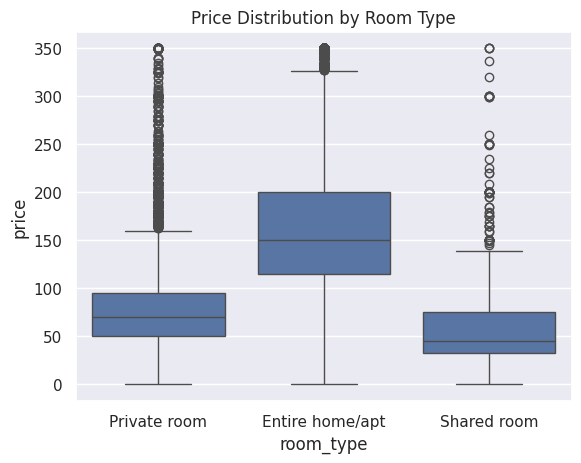

In [ ]:
filtered_data = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]

# Creating the boxplot
sns.boxplot(x='room_type', y='price', data=filtered_data)
plt.title('Price Distribution by Room Type')
plt.show()

##### 1. Why did you pick the specific chart?

**Comparative View:** Shows price distributions for different room types side-by-side.

**Clear Summary:** Highlights median, quartiles, and outliers visually for each category.

**Outlier Identification**: Helps spot extreme values without cluttering the visualization.

**Simplicity:** Provides a clear, concise overview of price ranges without overwhelming details.

**Room Type Comparison:** Enables easy comparison of price distributions among different room types in a single chart.

##### 2. What is/are the insight(s) found from the chart?

**Room type significantly influences price ranges** with variations and outliers across different categories.

**Distinct median prices and outlier presence** in specific room types highlight pricing disparities.

**Identification of potential pricing trends** among room types based on central tendencies and outlier observations.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights derived from price distribution generally lead to positive impacts but misinterpreting data or disregarding customer preferences might lead to:

**Overpricing Issues:** Deterring customers and reducing bookings.

**Ignoring Customer Preferences:** Resulting in disconnected pricing strategies.

**Resource Misallocation:** Impacts on revenue due to imbalanced investments.

**Competitive Disadvantage:** Losing market share due to misaligned pricing strategies.

#### Chart - 8  ( Scatter Plot: Price vs. Availability )

8. How does the scatter plot, generated by the provided code using Matplotlib, illustrate the correlation between price and yearly availability in the Airbnb dataset?

Solution:

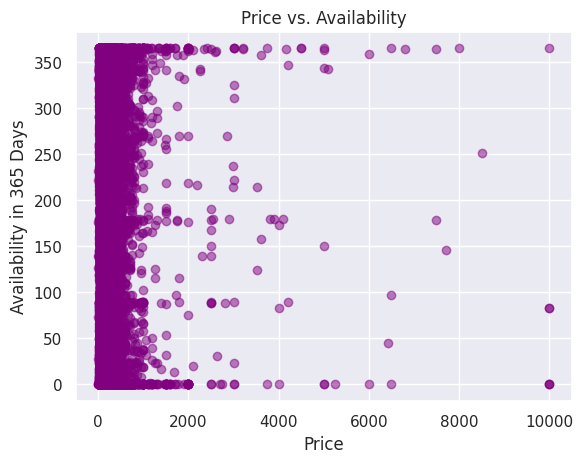

In [ ]:
plt.scatter(airbnb_df['price'], airbnb_df['availability_365'], color='purple', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Availability in 365 Days')
plt.title('Price vs. Availability')
plt.show()

##### 1. Why did you pick the specific chart?

**Correlation Check:** Visualizes the relationship between price and availability.

**Individual Data Points:** Shows the spread and concentration of prices concerning availability.

**Trend & Cluster Detection:** Identifies patterns or clusters, indicating price-range-specific availability.

**Outlier Identification:** Spotlights extreme data points for consideration in analysis.

**Data Spread Illustration:** Depicts the overall density and distribution of prices concerning availability.

##### 2. What is/are the insight(s) found from the chart?

**No Clear Price-Availability Trend:** No evident direct link between price and availability.

**Clustered Price Ranges:** Some groups suggest varied availability within specific price ranges.

**Outlier Detection:** Extreme availability at certain prices stands out, requiring further investigation.

**Varied Availability Spread:** Shows availability distribution across prices, hinting at potential market segments.

**Potential Marketing Clues:** Insights may guide targeted marketing for specific price points and availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Positive Impact:**

**Targeted Marketing:** Tailoring offerings to price clusters for better customer alignment.

**Pricing Optimization:** Adjusting rates based on extreme availability to maximize revenue.

**Efficiency Improvements**: Focused resource allocation for better operational efficiency.

**Potential Negative Impact:**

**Misinformed Pricing Changes:** Misinterpreting outliers might lead to revenue loss.

**Limited Marketing Focus:** Overemphasizing specific clusters could limit customer reach.

**Missed Opportunities:** Focusing too narrowly might overlook other profitable segments.

#### Chart - 9 (Histogram: Reviews per Month Distribution)

9. How does the Matplotlib code create a histogram displaying the distribution of reviews per month in the Airbnb dataset, using 30 bins?

Solution:

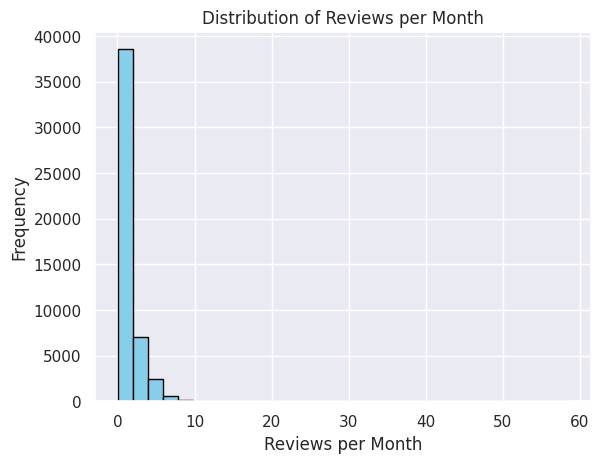

In [ ]:
plt.hist(airbnb_df['reviews_per_month'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews per Month')
plt.show()

##### 1. Why did you pick the specific chart?

* **Frequency Visualization:** Represents the frequency distribution of reviews per month.
* **Binned Data Representation:** Displays the distribution of reviews per month across 30 bins for a clearer view.
* **Clear Frequency Count:** Visualizes the count of reviews falling within each specified bin range.

##### 2. What is/are the insight(s) found from the chart?

**Review Frequency Distribution:** Illustrates how reviews are distributed across different monthly counts.

**Peak Frequencies:** Identifies peaks or high-frequency ranges, indicating common review rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Provides insights into the frequency distribution of reviews, aiding in understanding customer engagement and satisfaction levels.

**Negative Impact:**

* Sole reliance on this representation might oversimplify customer satisfaction analysis, potentially overlooking factors contributing to varying review frequencies or sentiments.

#### Chart - 10 ( Kernel Density Estimate (KDE) Plot: Price Distribution)

10. How does the Seaborn and Matplotlib code snippet generate a Kernel Density Estimate (KDE) plot for price distribution, specifically between 0 and 350 in an Airbnb dataset?

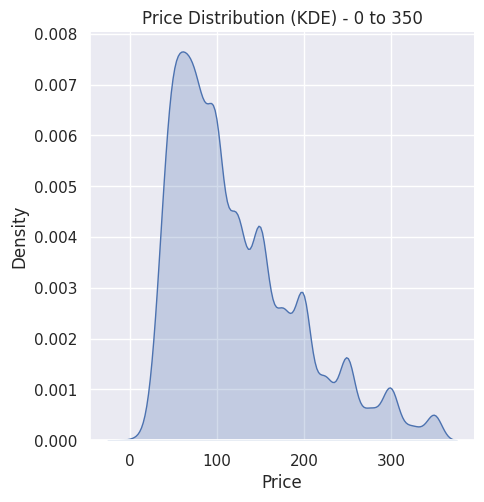

In [ ]:
filtered_prices = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]['price']

sns.displot(filtered_prices, kind='kde', fill=True)
plt.title('Price Distribution (KDE) - 0 to 350')
plt.xlabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

**Visual Distribution:** Shows the density estimation of prices within a specified range, providing a smooth visual representation of price concentration.

**Clarity in Price Spread:** Demonstrates the spread and concentration of prices, particularly within the specified range (0 to 350).

**Kernel Density Estimation:** Offers a smoothed representation of the probability density function for prices within the range.

##### 2. What is/are the insight(s) found from the chart?

* **Concentration of Prices:** Indicates where prices are most concentrated within the specified range.

* **Density Peaks:** Highlights peaks or modes, showing potential price preferences or common ranges within 0 to 350.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Helps in understanding price concentration within a specific range, aiding in strategic pricing decisions or promotions.

**Negative Impact:** Overreliance on this visualization alone might oversimplify pricing strategies, potentially overlooking optimal pricing opportunities or customer preferences outside this range.

#### Chart - 11  (Stacked Bar Chart: Room Type Distribution by Neighbourhood Group)

11. How does the Pandas crosstab function in conjunction with Matplotlib generate a stacked bar chart illustrating the distribution of room types across different neighborhood groups in the Airbnb dataset ?

Solution:

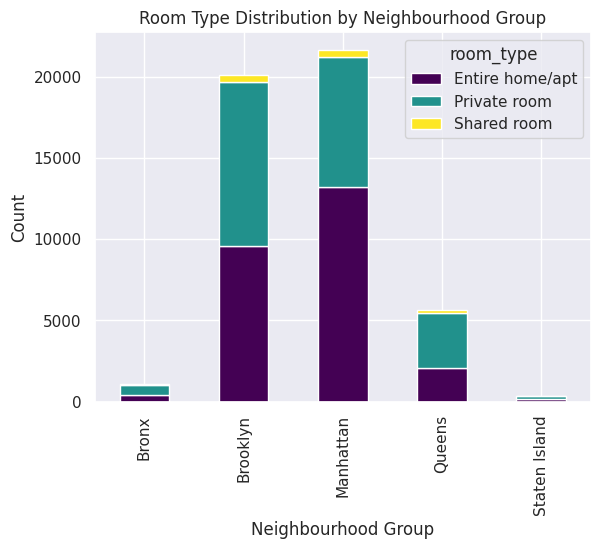

In [ ]:
cross_tab = pd.crosstab(airbnb_df['neighbourhood_group'], airbnb_df['room_type'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Room Type Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

**Categorical Comparison:** Visually compares room type distributions across different neighborhood groups effectively.

**Clear Representation:** Presents counts of room types in each neighborhood group distinctly, aiding in easy comparison.

**Stacked Bars for Comparison:** Stacking room types helps visualize their composition within each neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

* **Room Type Distribution Variation:** Shows how room types are distributed across different neighborhood groups.

* **Dominant Room Types:** Identifies which room types are prevalent in each neighborhood group.

* **Comparative View:** Allows comparison of room type distribution among various neighborhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Offers insights for targeted marketing or pricing strategies based on room type preferences within specific neighborhood groups.

**Negative Impact:** Overemphasis on room type distribution without considering other factors might lead to oversimplified strategies that overlook customer preferences or demand variations, impacting growth negatively.

#### Chart - 12 (Area Chart: Availability Over Time)



12. How does the code visualize the trend of availability over time, considering dates after 2000 in the Airbnb dataset?

Solution:

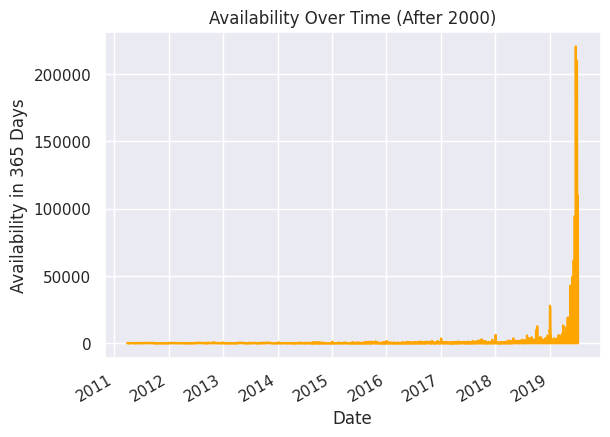

In [ ]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

# Filtering data for dates after the year 2000
airbnb_df = airbnb_df[airbnb_df['last_review'].dt.year > 2000]

availability_over_time = airbnb_df.groupby('last_review')['availability_365'].sum()
availability_over_time.plot(kind='area', color='orange')

plt.title('Availability Over Time (After 2000)')
plt.xlabel('Date')
plt.ylabel('Availability in 365 Days')
plt.show()

##### 1. Why did you pick the specific chart?

**Temporal Insight:** Depicts availability trends over time after the year 2000.

**Data Aggregation:** Summarizes availability on a temporal scale (date-wise).

**Visualizing Change:** Highlights changes in availability patterns over the specified time period.

**Clarity in Trends:** Provides a clear overview of availability fluctuations in a visually comprehensible manner.

**Insightful Comparison:** Allows for easy comparison of availability changes over time, aiding in identifying seasonal or long-term trends.

##### 2. What is/are the insight(s) found from the chart?

**Identified Availability Trends:** Shows highs and lows over time.

**Patterns & Irregularities:** Highlights any recurring availability patterns.

**Long-Term Shifts Noted:** Indicates major changes in availability trends.

**Seasonal Availability:** Reveals if availability follows seasonal trends.

**Historical Evolution:** Offers insights into how availability has changed over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* **Strategic Planning:** Helps in predicting demand fluctuations, aiding in inventory management and pricing strategies for peak and off-peak periods.
However, potential negative impacts could arise if these insights are misinterpreted or solely relied upon:

**Potential Negative Impact:**

* **Overlooking Other Factors:** Solely relying on availability trends might overlook broader market dynamics or customer preferences, potentially resulting in misaligned strategies or neglect of other growth opportunities.

#### Chart - 13 ( Joint Plot: Price and Reviews per Month)

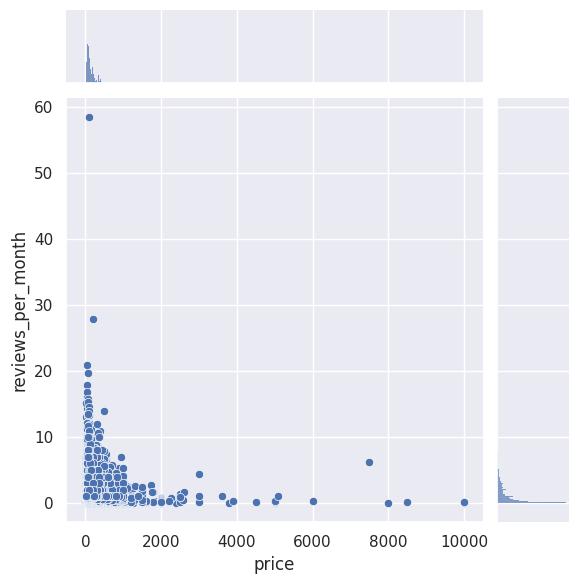

In [ ]:
sns.jointplot(x='price', y='reviews_per_month', data=airbnb_df, kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

* **Price-Reviews Correlation**
* **Scatter Plot Analysis**
* **Relationship Visualization**

##### 2. What is/are the insight(s) found from the chart?

**Correlation Analysis:**

* Weak correlation

* Sparse distribution

* Limited Correlation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact:**

* **Informed Decision-making:** Helps avoid unnecessary pricing changes based solely on review frequency, preventing potential negative customer reactions and maintaining revenue.

**Potential Negative Impact:**

* **Overlooking Customer Satisfaction:** Relying solely on review frequency might overlook pricing issues affecting customer satisfaction, potentially leading to negative reviews or decreased bookings.

* **Missed Pricing Opportunities:** Ignoring other factors influencing reviews might result in missed pricing strategies that could positively impact customer perception and revenue.,

#### Chart - 14 - Correlation Heatmap

 14. Draw heatmap for the correlation .

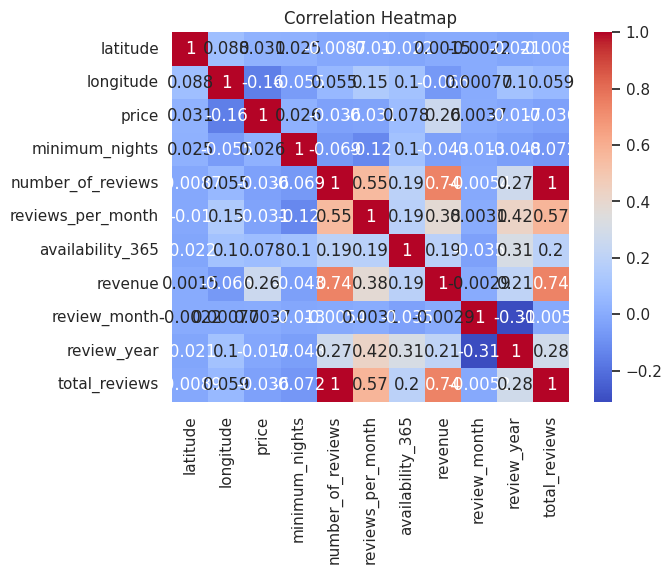

In [ ]:
sns.heatmap(airbnb_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

* **Multivariate Insight:** Allows simultaneous observation of correlations among multiple variables.
* **Efficient Visual Representation:** Color coding quickly identifies strong positive and negative correlations.
* **Precise Details:** Annotated values provide exact correlation coefficients for each relationship.
* **Comprehensive View:** Offers a holistic understanding of inter-variable relationships.
* **Detects Multicollinearity:** Assists in identifying potential multicollinearity concerns for modeling purposes.

##### 2. What is/are the insight(s) found from the chart?

**Price and Availability:** A subtle negative correlation.

**Number of Reviews and Reviews per Month:** Positively correlated.

**Overall Low Correlation:** Most variables show weak linear relationships.

**Independence of Variables**: Limited multicollinearity risk.

**Geographic Coordinates:** Weakly associated with other features.Answer Here

#### Chart - 15 -  (Pair Plot of numerical features by room type)

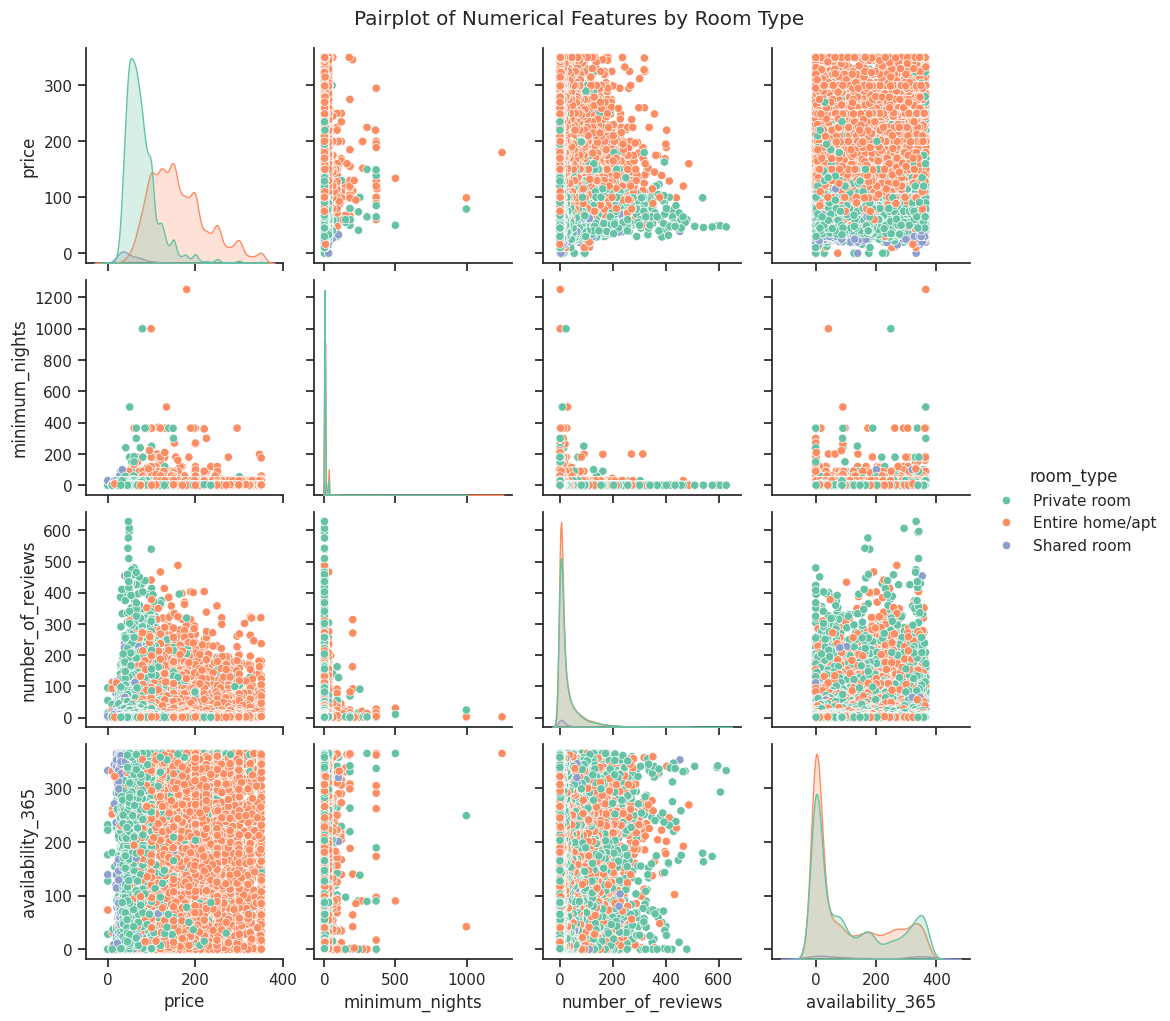

In [ ]:
filtered_data = airbnb_df[(airbnb_df['price'] >= 0) & (airbnb_df['price'] <= 350)]

# Customize Seaborn style and pairplot settings
sns.set(style='ticks')  # Setting the overall style

# Create pairplot with different colors for different room types
g = sns.pairplot(filtered_data[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'room_type']],
                 hue='room_type', palette='Set2')
g.fig.suptitle('Pairplot of Numerical Features by Room Type', y=1.02)  # Adjusting the title position
plt.show()

##### 1. Why did you pick the specific chart?

1. **Multivariate Insights**: Pairplot enables the simultaneous visualization of multiple numerical features, aiding in assessing correlations and distributions.

2. **Room Type Differentiation:** Using hue to distinguish room types allows for a comparative analysis of patterns across different accommodation categories.

3. **Comprehensive Assessment:** It offers a holistic view of relationships between variables, aiding in identifying potential correlations between price, minimum nights, reviews, and availability across various room types.

4. **Quick Pattern Recognition:** The visual grid layout allows for rapid identification of any outliers, clusters, or trends within and across the different room types.

5. **Enhanced Data Understanding:** It's an effective way to comprehend the interplay of various numerical features concerning different room types, facilitating deeper insights into their relationships.

##### 2. What is/are the insight(s) found from the chart?


* **Price Distribution:** Visualizing how pricing varies across room types, indicating potential market segments based on affordability.

* **Minimum Nights:** Understanding the minimum nights' distribution suggests flexibility in stay duration preferences for different room types.

* **Number of Reviews**: Revealing room types with higher or lower engagement levels, aiding in assessing popularity or satisfaction levels.

* **Availability:** Exploring availability patterns can hint at the demand for specific room types throughout the year.

* **Room Type Differentiation:** The pairplot colors each room type differently, aiding in easily differentiating trends and distributions specific to each type.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
* **Dynamic Pricing:** Implement adaptable pricing models.
* **Enhanced Communication:** Foster better engagement between hosts and guests.
* **Feedback System:** Develop a robust feedback mechanism for prompt issue resolution.
* **Host Incentives:** Offer rewards to hosts for better service.
* **Localized Marketing:** Customize promotions based on neighborhood trends.
* **Personalization:** Tailor experiences based on user preferences.
* **Platform Stability:** Ensure a user-friendly and stable platform.
* **New Host Support**: Offer resources for seamless onboarding.
* **Booking Analysis:** Analyze user behavior for optimized offerings.
* **Adaptation:** Stay updated and adapt to industry changes for sustained growth.

# **Conclusion**

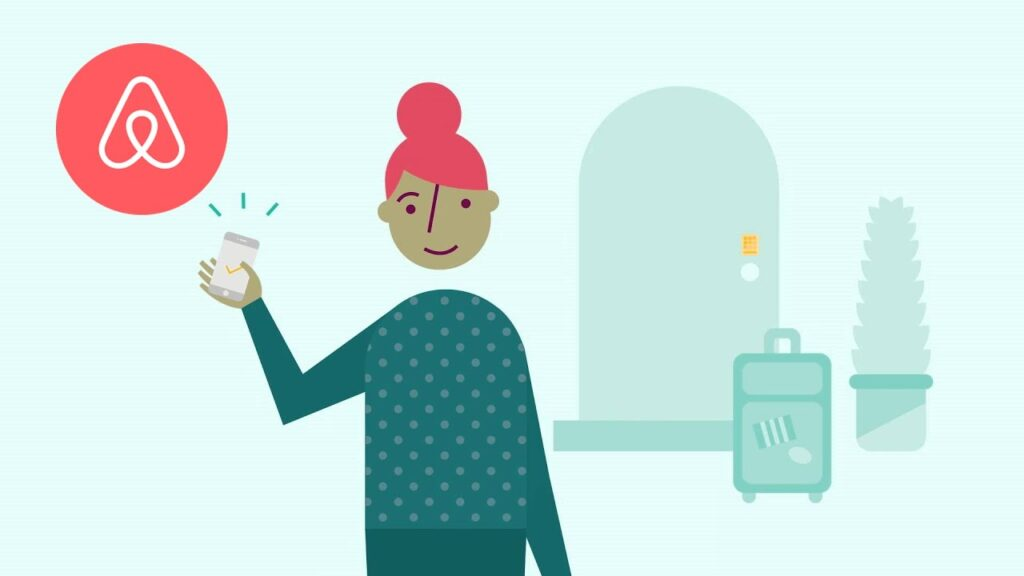

* Neighborhood-based pricing insights can inform targeted pricing strategies.
* Room type distribution knowledge assists in focused marketing efforts.
* Geographic variations affect pricing dynamics and target customer segments.
* Host activity influences customer satisfaction levels.
* Competitive analysis supports strategic positioning in the market.
* Data-driven decisions optimize marketing tactics and pricing strategies.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***